In [1]:
from typing import List
import numpy as np

def recognize_faces(frame: np.ndarray, device: str) -> List[np.array]:
    """
    Detects faces in the given image and returns the facial images cropped from the original.

    This function reads an image from the specified path, detects faces using the MTCNN
    face detection model, and returns a list of cropped face images.

    Args:
        frame (numpy.ndarray): The image frame in which faces need to be detected.
        device (str): The device to run the MTCNN face detection model on, e.g., 'cpu' or 'cuda'.

    Returns:
        list: A list of numpy arrays, representing a cropped face image from the original image.

    Example:
        faces = recognize_faces('image.jpg', 'cuda')
        # faces contains the cropped face images detected in 'image.jpg'.
    """

    def detect_face(frame: np.ndarray):
        mtcnn = MTCNN(keep_all=False, post_process=False, min_face_size=40, device=device)
        bounding_boxes, probs = mtcnn.detect(frame, landmarks=False)
        if probs[0] is None:
            return []
        bounding_boxes = bounding_boxes[probs > 0.9]
        return bounding_boxes

    bounding_boxes = detect_face(frame)
    facial_images = []
    for bbox in bounding_boxes:
        box = bbox.astype(int)
        x1, y1, x2, y2 = box[0:4]
        facial_images.append(frame[y1:y2, x1:x2, :])
    return facial_images

In [ ]:
!pip install emotiefflib


In [4]:
import os
from typing import List

import cv2
import matplotlib.pyplot as plt
import numpy as np
from facenet_pytorch import MTCNN
from emotiefflib.facial_analysis import EmotiEffLibRecognizer, get_model_list

2025-02-25 15:06:07.644900: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/florentinafabregas/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
# Test image 
input_file = '../data/CityInfant/BlackWhite/B2PosBW.bmp'
device = 'cpu'
model_name = get_model_list()[0]

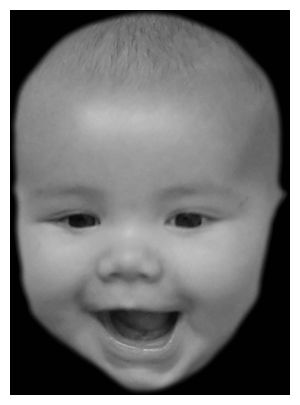

In [6]:
frame_bgr = cv2.imread(input_file)
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(frame)

In [ ]:
facial_images = recognize_faces(frame, device)

fer = EmotiEffLibRecognizer(engine="onnx", model_name=model_name, device=device)

emotions = []
for face_img in facial_images:
    emotion, _ = fer.predict_emotions(face_img, logits=True)
    emotions.append(emotion[0])
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(emotion[0])

### EmotiEffLib with PyTorch

In [9]:
import os
from typing import List

import cv2
import torch
import matplotlib.pyplot as plt
import numpy as np
from facenet_pytorch import MTCNN
from emotiefflib.facial_analysis import EmotiEffLibRecognizer, get_model_list

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

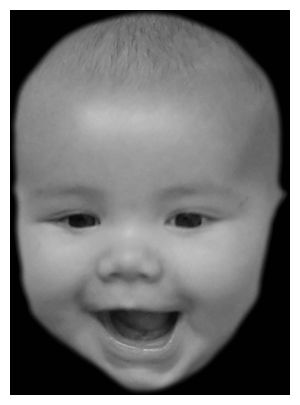

In [10]:
frame_bgr = cv2.imread(input_file)
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(frame)

In [15]:
facial_images = recognize_faces(frame, device)

fer = EmotiEffLibRecognizer(engine="torch", model_name=model_name, device=device)

emotions = []
for face_img in facial_images:
    emotion, _ = fer.predict_emotions(face_img, logits=True)
    emotions.append(emotion[0])
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(emotion[0])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/florentinafabregas/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/cc/g293_qcj1hj4trkgsm21wwxr0000gn/T/ipykernel_59992/1432368048.py", line 7, in <module>
    emotion, _ = fer.predict_emotions(face_img, logits=True)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/florentinafabregas/anaconda3/lib/python3.11/site-packages/emotiefflib/facial_analysis.py", line 249, in predict_emotions
    features = self.extract_features(face_img)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/florentinafabregas/anaconda3/lib/python3.11/site-packages/emotiefflib/facial_analysis.py", line 311, in extract_features
    img_tensor = self._preprocess(face_img)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/florentinafabregas/anaconda3/lib/python3.11/site-packages/emotiefflib/facial_ana

In [16]:
from keras.applications import ResNet50

# Print the ResNet50 model summary to confirm it exists and is working
model = ResNet50(weights='imagenet')
model.summary()


102967424/102967424 [==============================] - 6s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                    